한번에 여러 기간을 예측해봅시다. 

https://www.tensorflow.org/tutorials/structured_data/time_series


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import pandas_datareader.data as web

df = web.DataReader('005930', 'naver', start='2010-01-01', end='2020-12-31')

In [3]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,16060,16180,16000,16180,239271
2010-01-05,16520,16580,16300,16440,559219
2010-01-06,16580,16820,16520,16820,459755
2010-01-07,16820,16820,16260,16260,443237
2010-01-08,16400,16420,16120,16420,295798
...,...,...,...,...,...
2020-12-23,72400,74000,72300,73900,19411326
2020-12-24,74100,78800,74000,77800,32502870
2020-12-28,79000,80100,78200,78700,40085044


In [ ]:
df.dtypes

Open      object
High      object
Low       object
Close     object
Volume    object
dtype: object

In [4]:
import pandas as pd
df=df.apply(pd.to_numeric)

In [ ]:
df.dtypes

Open      int64
High      int64
Low       int64
Close     int64
Volume    int64
dtype: object

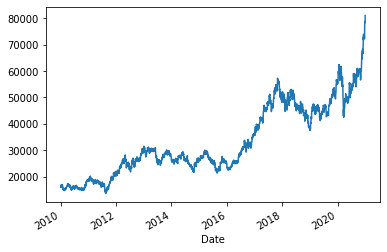

In [5]:
df.Close.plot()

In [6]:
TEST_SIZE = 300

train = df.Close[:-TEST_SIZE]
test = df.Close[-TEST_SIZE:]

In [7]:
import numpy as np
window_size = 20
pred_size = 5

inputs = []
targets = []
for i in range(len(train) - window_size-pred_size):
    inputs.append(np.array(train[i:i+window_size]))
    targets.append(np.array(train[i+window_size:i+window_size+pred_size]))


In [8]:
inputs[0]

array([16180, 16440, 16820, 16260, 16420, 15940, 16180, 15940, 16540,
       16840, 16860, 16460, 16680, 17000, 16500, 16840, 16300, 16000,
       16160, 15680])

In [9]:
targets[0]

array([15540, 15440, 15540, 15520, 15000])

In [10]:
df.head(30)

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,16060,16180,16000,16180,239271
2010-01-05,16520,16580,16300,16440,559219
2010-01-06,16580,16820,16520,16820,459755
2010-01-07,16820,16820,16260,16260,443237
2010-01-08,16400,16420,16120,16420,295798
2010-01-11,16420,16460,15940,15940,398901
2010-01-12,15940,16180,15900,16180,384460
2010-01-13,16100,16119,15940,15940,267619
2010-01-14,16120,16620,16000,16540,532705


In [11]:
inputs = np.array(inputs)
targets = np.array(targets)

In [12]:
print(inputs.shape)
print(targets.shape)

(2389, 20)
(2389, 5)


In [13]:
window_size = 20
pred_size = 5

test_inputs = []
test_targets = []
for i in range(len(test) - window_size - pred_size):
    test_inputs.append(np.array(test[i:i+window_size]))
    test_targets.append(np.array(test[i+window_size:i+window_size+pred_size]))
test_inputs=np.array(test_inputs)
test_targets = np.array(test_targets)

In [14]:
test_inputs = np.expand_dims(test_inputs,2)

In [15]:
test_inputs.shape

(275, 20, 1)

In [16]:

test_targets.shape

(275, 5)

In [17]:
inputs = np.expand_dims(inputs,2)
targets = np.expand_dims(targets,2)
test_targets = np.expand_dims(test_targets,2)

In [18]:
test_targets.shape

(275, 5, 1)

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.Sequential()
model.add(layers.SimpleRNN(20, 
                           input_shape=(20,1),
                           activation='relu', 
                           return_sequences=False)
          )

model.add(layers.Dense(5))
model.add(layers.Reshape([5,1]))


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 20)                440       
_________________________________________________________________
dense (Dense)                (None, 5)                 105       
_________________________________________________________________
reshape (Reshape)            (None, 5, 1)              0         
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [21]:

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(inputs, targets, 
                                    epochs=10, 
                                    batch_size=32,
                                    validation_data=(test_inputs, test_targets))

Epoch 1/10
75/75 [==============================] - 2s 10ms/step - loss: 747652996.2105 - val_loss: 524139168.0000
Epoch 2/10
75/75 [==============================] - 0s 4ms/step - loss: 66677163.7895 - val_loss: 7082548.0000
Epoch 3/10
75/75 [==============================] - 0s 4ms/step - loss: 1462041.5872 - val_loss: 7594646.5000
Epoch 4/10
75/75 [==============================] - 0s 4ms/step - loss: 1371574.1562 - val_loss: 6656616.0000
Epoch 5/10
75/75 [==============================] - 0s 4ms/step - loss: 1275316.2196 - val_loss: 6661190.5000
Epoch 6/10
75/75 [==============================] - 0s 4ms/step - loss: 1260235.5148 - val_loss: 6443089.0000
Epoch 7/10
75/75 [==============================] - 0s 4ms/step - loss: 1222816.8429 - val_loss: 6322349.5000
Epoch 8/10
75/75 [==============================] - 0s 4ms/step - loss: 1215633.7105 - val_loss: 7072312.5000
Epoch 9/10
75/75 [==============================] - 0s 4ms/step - loss: 1390596.7426 - val_loss: 6152137.0000
Epoc

In [22]:
pred = model.predict(test_inputs)

In [23]:
pred.shape

(275, 5, 1)

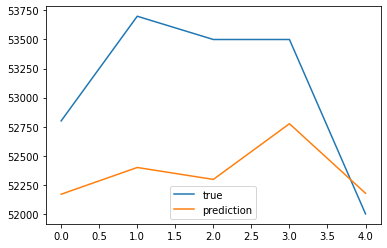

In [24]:
import matplotlib.pyplot as plt

plt.plot(test_targets[0,:,0], label = 'true')
plt.plot(pred[0,:,0], label = 'prediction')
plt.legend()

In [25]:
test_inputs.shape

(275, 20, 1)

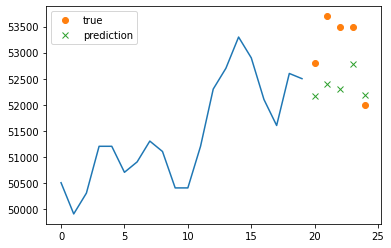

In [26]:
import matplotlib.pyplot as plt
plt.plot(test_inputs[0,:,0])
plt.plot(range(20,25),test_targets[0,:,0], label = 'true', marker='o',linestyle='None')
plt.plot(range(20,25),pred[0,:,0], label = 'prediction', marker='x',linestyle='None')
plt.legend()